# TRS dataset exploratory analysis
Aquest document té com a objectiu realitzar una anàlisi exploratòria de les dades (EDA) del conjunt de dades TRS. L'objectiu és comprendre millor les característiques i distribucions de les dades, identificar possibles anomalies i preparar-les per als proccessos d'analisi posteriors.

## 1. Setup 
Importem les llibreries necessàries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 2. Preparació de les dades

Carreguem les dades dels datasets d'entrenament i d'evaluació. Dividim el dataset d'entrenament en característiques i variable objectiu (X,Y).
A continuació, fem una petita visualització inicial de les dades.

In [3]:
# Carreguem totes les dades
train = pd.read_csv('trs_train.csv')
eval = pd.read_csv('trs_eval.csv')
# Separem la variable objectiu de les característiques
Y_train = train['TRS']
X_train = train.drop(columns=['TRS'])

print(f"Training set: {X_train.shape[0]} samples")
print(f"Eval set: {eval.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print()
print('---------------------------------------------------------------------')
print()
print('Primeres files del dataset:')
X_train.head()


Training set: 9000 samples
Eval set: 1000 samples
Number of features: 27

---------------------------------------------------------------------

Primeres files del dataset:


,patient_id,Age,Sex,Ethnicity,Duration_untreated_psychosis,Family_history,Initial_response,Lymphocyte_count,Neutrophil_count,BMI,...,HLA_A_31_01,Polygenic_risk_score,Del_22q11_2_status,IL_17A,CCL23,TWEAK,Ki_whole_striatum,Ki_associative_striatum,SUVRc_whole_striatum,SUVRc_associative_striatum
0,1,28.0,1,Caucasian,7.5,1,24.7,2.35,NaN,31.2,...,1,0.330,0,2.76,5.66,4.47,0.01147,0.01082,1.225,1.133
1,2,23.0,1,Asian,3.6,1,41.0,2.02,3.34,26.2,...,0,0.121,0,2.04,2.67,1.93,0.01386,0.01437,1.042,1.502
2,3,29.0,1,Caucasian,7.4,0,6.0,NaN,5.38,39.2,...,0,-0.098,0,1.55,2.31,2.92,0.01589,0.01632,1.728,1.842
3,4,36.0,0,Hispanic,5.5,0,43.4,1.60,6.84,31.5,...,0,0.019,0,1.77,2.37,4.26,0.01178,0.01154,1.399,1.249
4,5,23.0,0,Caucasian,4.5,0,86.1,NaN,3.18,29.6,...,0,-0.049,0,2.11,3.55,3.84,0.01209,0.01171,0.800,1.533


A continuació, convertim les variables binàries de tipus numèric a categòric.

In [4]:
cols_bin_categ = ["Sex", "Family_history", "Del_22q11_2_status", "Prior_antipsychotics", "HLA_DRB1_04_02", "HLA_B_15_02", "HLA_A_31_01", "Ethnicity", "CYP2D6_metabolic_phenotype"]  # noms de columnes 0/1

for col in cols_bin_categ:
    X_train[col] = X_train[col].astype('category')

Mostra el nombre de columnes, juntament amb el nombre de valors no nuls de cada característica, amb el seu tipus.

In [5]:
# Dataset info summary (captured via buffer to display as text in notebook)
from io import StringIO
buffer = StringIO()
X_train.info(buf=buffer)
print(buffer.getvalue())
print()
X_train.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   patient_id                    9000 non-null   int64   
 1   Age                           9000 non-null   float64 
 2   Sex                           9000 non-null   category
 3   Ethnicity                     9000 non-null   category
 4   Duration_untreated_psychosis  8872 non-null   float64 
 5   Family_history                9000 non-null   category
 6   Initial_response              9000 non-null   float64 
 7   Lymphocyte_count              7009 non-null   float64 
 8   Neutrophil_count              7015 non-null   float64 
 9   BMI                           9000 non-null   float64 
 10  Triglycerides                 6547 non-null   float64 
 11  Glucose                       6381 non-null   float64 
 12  Alkaline_phosphatase          6062 non-null   fl

patient_id                         0
Age                                0
Sex                                0
Ethnicity                          0
Duration_untreated_psychosis     128
Family_history                     0
Initial_response                   0
Lymphocyte_count                1991
Neutrophil_count                1985
BMI                                0
Triglycerides                   2453
Glucose                         2619
Alkaline_phosphatase            2938
Prior_antipsychotics               0
CYP2D6_metabolic_phenotype         0
HLA_DRB1_04_02                     0
HLA_B_15_02                        0
HLA_A_31_01                        0
Polygenic_risk_score               1
Del_22q11_2_status                 0
IL_17A                             1
CCL23                              0
TWEAK                              0
Ki_whole_striatum                  0
Ki_associative_striatum            0
SUVRc_whole_striatum               0
SUVRc_associative_striatum         0
d

# 3. Anàlisi correlacions

Analitzem les correlacions entre característiques i amb la variable resposta

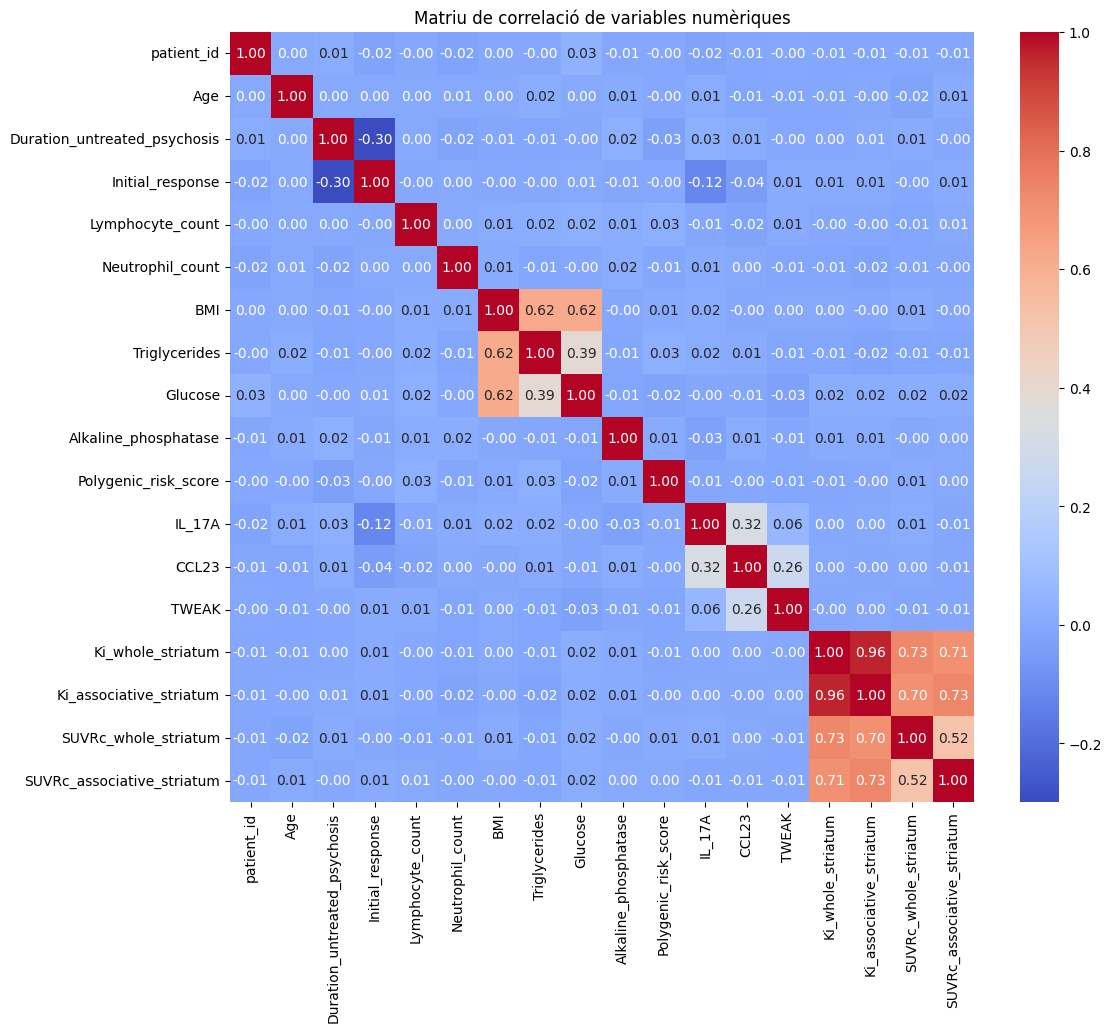

Correlació amb TRS (ordenada per valor absolut):
Initial_response               -0.204562
Duration_untreated_psychosis    0.135856
Polygenic_risk_score            0.072212
Ki_associative_striatum         0.047368
Ki_whole_striatum               0.047139
SUVRc_whole_striatum            0.031959
SUVRc_associative_striatum      0.030580
Neutrophil_count               -0.018326
Triglycerides                   0.015245
IL_17A                          0.013069
patient_id                      0.012770
Age                            -0.012348
Alkaline_phosphatase           -0.011646
TWEAK                          -0.004745
BMI                             0.004131
CCL23                          -0.004086
Lymphocyte_count               -0.002276
Glucose                         0.000021
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5548\567273299.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target[corr_target_abs_sorted.index], y=corr_target_abs_sorted.index, palette="viridis")


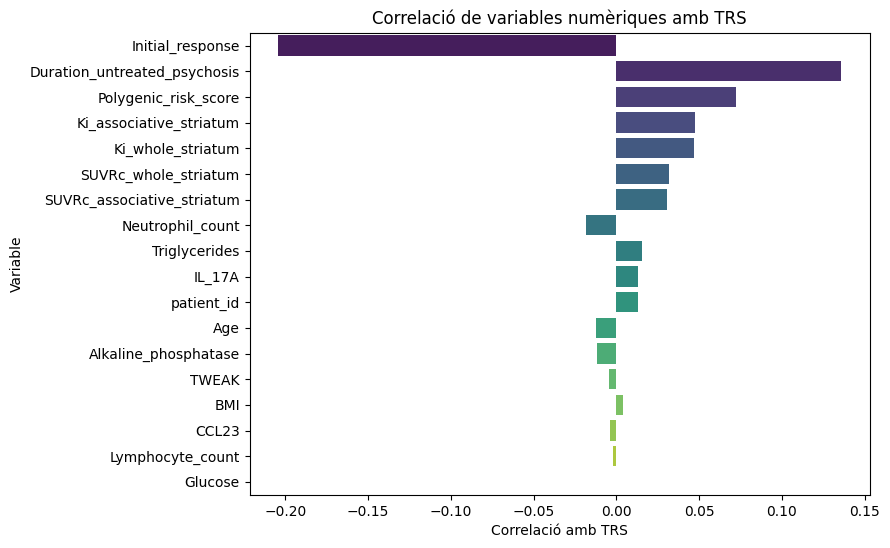

In [6]:
# Suposant que tens X_train i y_train
# num_cols → llista de columnes numèriques
num_cols = X_train.select_dtypes(include='number').columns

# 1️⃣ Matriu de correlació entre variables numèriques
corr_matrix = X_train[num_cols].corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriu de correlació de variables numèriques")
plt.show()

# 2️⃣ Correlació de cada variable amb la variable objectiu
corr_target = X_train[num_cols].corrwith(Y_train)

# Mostrar llistat ordenat per correlació absoluta
corr_target_abs_sorted = corr_target.abs().sort_values(ascending=False)
print("Correlació amb TRS (ordenada per valor absolut):")
print(corr_target[corr_target_abs_sorted.index])

# Opcional: gràfic de barra per visualitzar les correlacions amb TRS
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target[corr_target_abs_sorted.index], y=corr_target_abs_sorted.index, palette="viridis")
plt.title("Correlació de variables numèriques amb TRS")
plt.xlabel("Correlació amb TRS")
plt.ylabel("Variable")
plt.show()

In [6]:

numeric_cols = X_train.select_dtypes(include=[np.number]).columns

outlier_stats = {}

for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    n_outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()
    outlier_stats[col] = n_outliers

# Mostrar variables amb més outliers
pd.Series(outlier_stats).sort_values(ascending=False)


Duration_untreated_psychosis    651
Age                             360
Polygenic_risk_score            125
Ki_associative_striatum          83
Ki_whole_striatum                71
CCL23                            59
TWEAK                            58
IL_17A                           57
BMI                              39
SUVRc_whole_striatum             35
Neutrophil_count                 32
SUVRc_associative_striatum       29
Lymphocyte_count                 26
Alkaline_phosphatase             23
Triglycerides                    22
Glucose                          16
patient_id                        0
Initial_response                  0
dtype: int64

# 5. Anàlisi variable objectiu

Observem la distribució de la variable objectiu, per decidir si caldrà fer algún mètode de balanceig.


TRS
0    6162
1    2838
Name: count, dtype: int64
TRS
0    68.466667
1    31.533333
Name: proportion, dtype: float64


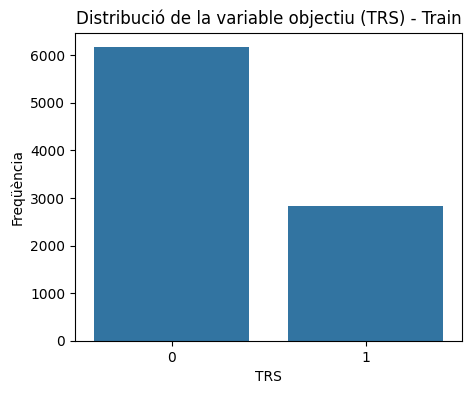

In [7]:
# Distribució de la variable objectiu, on 0 vol dir que no tenen resistència al tractament i 1 sí.
print()
print(Y_train.value_counts())
# Percentatge per classe
percent = Y_train.value_counts(normalize=True) * 100
print(percent)
plt.figure(figsize=(5,4))
sns.countplot(x=Y_train)
plt.title("Distribució de la variable objectiu (TRS) - Train")
plt.xlabel("TRS")
plt.ylabel("Freqüència")
plt.show()



In [13]:
print(X_train['Age'].skew())
print(X_train['Duration_untreated_psychosis'].skew())
print(X_train['SUVRc_whole_striatum'].skew())

1.2590024743806656
2.150842234534674
0.4341936380309704


# 6. Anàlisi exploratori de les caracteristiques numèriques

--- Age ---
count    9000.000000
mean       26.039444
std        10.011767
min        13.000000
25%        19.000000
50%        25.000000
75%        31.000000
max        64.000000
Name: Age, dtype: float64


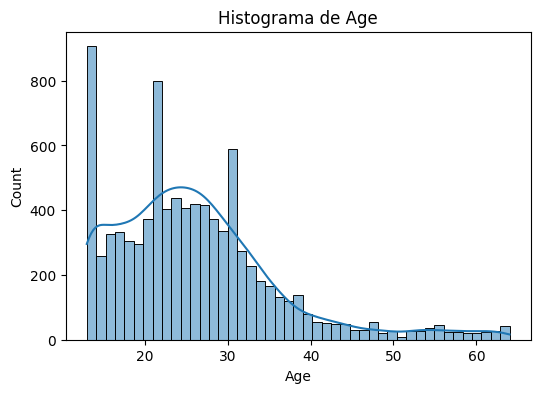

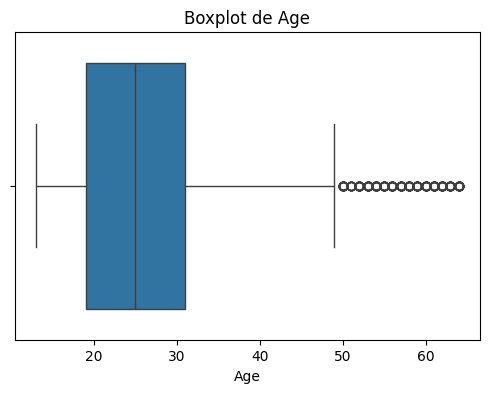

--- Duration_untreated_psychosis ---
count    8872.000000
mean       19.220548
std        19.545745
min         0.300000
25%         6.400000
50%        12.500000
75%        24.300000
max       125.000000
Name: Duration_untreated_psychosis, dtype: float64


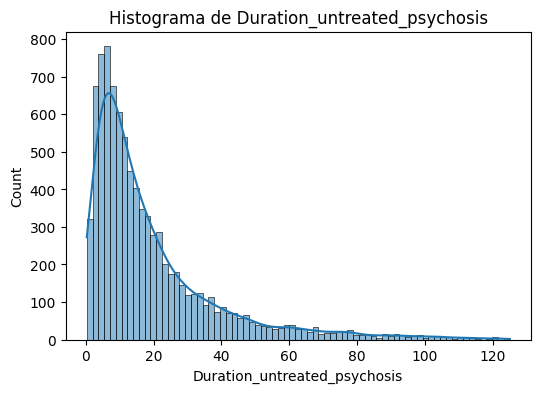

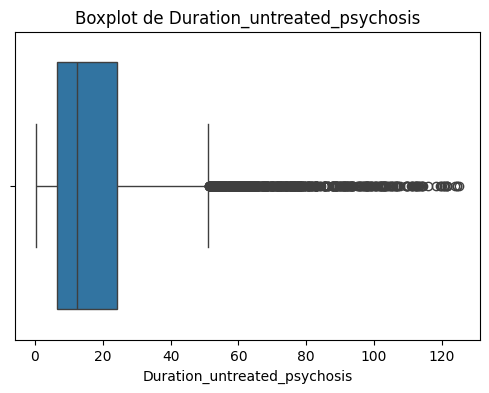

--- Initial_response ---
count    9000.000000
mean       41.840367
std        30.160230
min         0.000000
25%        10.100000
50%        38.200000
75%        72.300000
max       100.000000
Name: Initial_response, dtype: float64


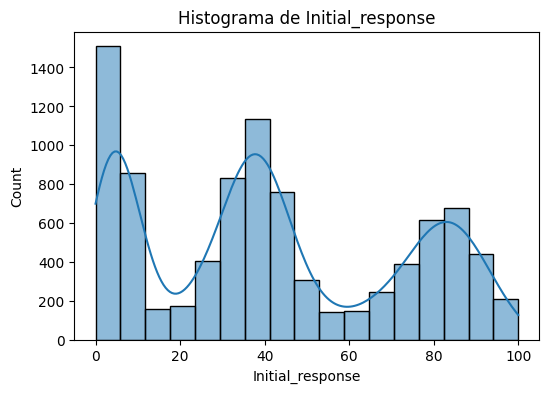

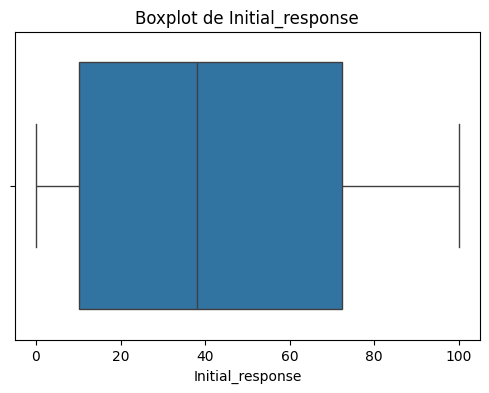

--- Lymphocyte_count ---
count    7009.000000
mean        1.795761
std         0.601099
min         0.500000
25%         1.380000
50%         1.800000
75%         2.200000
max         4.020000
Name: Lymphocyte_count, dtype: float64


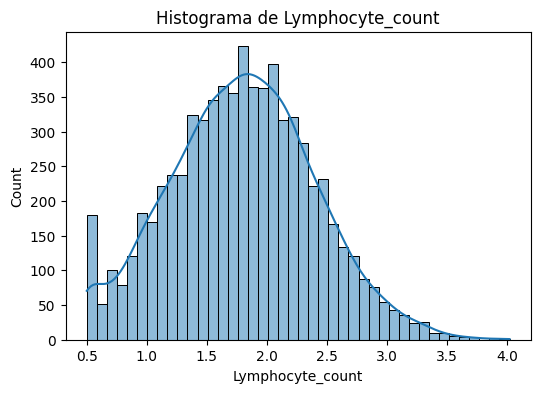

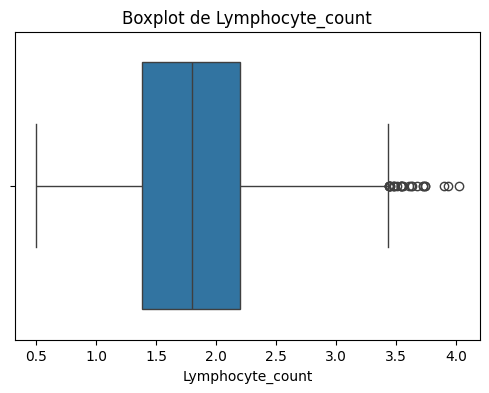

--- Neutrophil_count ---
count    7015.000000
mean        5.014574
std         1.471581
min         1.500000
25%         4.005000
50%         5.020000
75%         6.010000
max         9.960000
Name: Neutrophil_count, dtype: float64


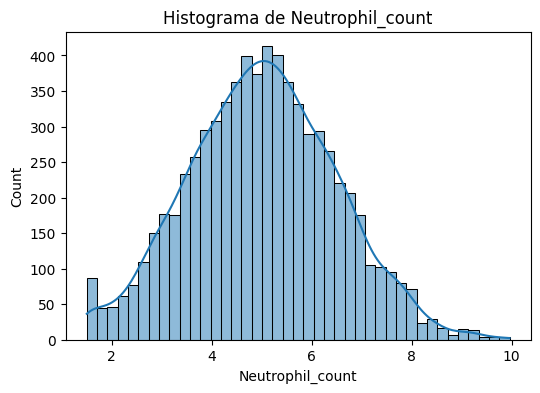

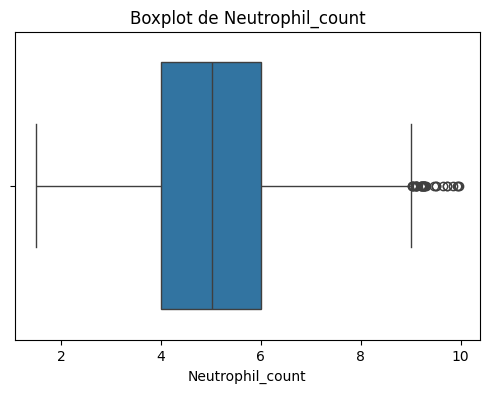

--- BMI ---
count    9000.000000
mean       28.107556
std         5.433100
min        15.000000
25%        24.400000
50%        28.000000
75%        31.700000
max        49.600000
Name: BMI, dtype: float64


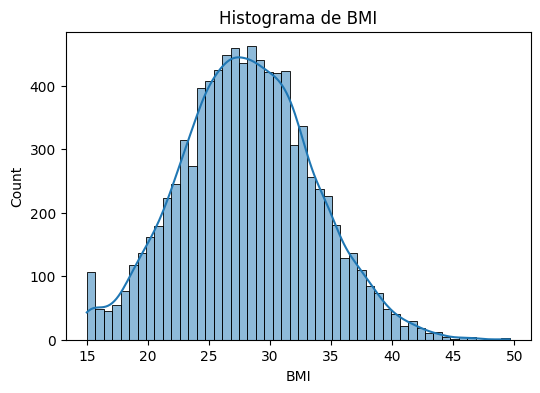

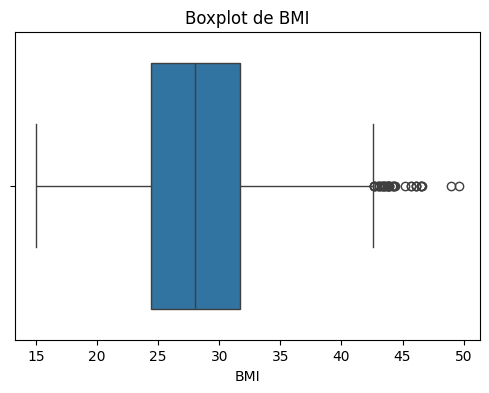

--- Triglycerides ---
count    6547.000000
mean      152.012800
std        61.099018
min        40.000000
25%       108.050000
50%       151.100000
75%       194.600000
max       394.600000
Name: Triglycerides, dtype: float64


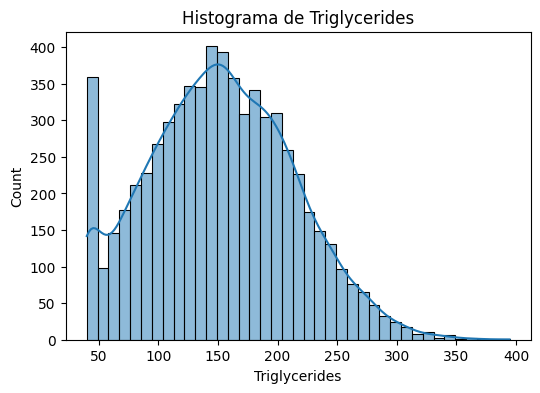

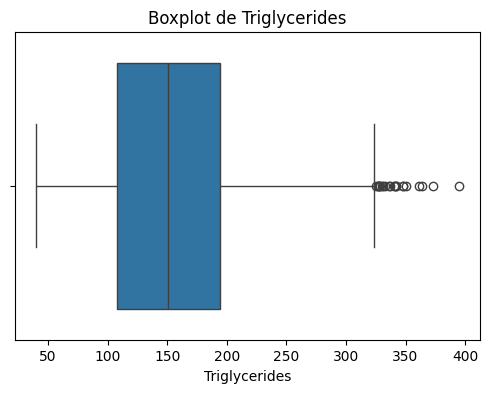

--- Glucose ---
count    6381.000000
mean       95.859881
std        18.310027
min        65.000000
25%        82.200000
50%        95.500000
75%       108.300000
max       159.600000
Name: Glucose, dtype: float64


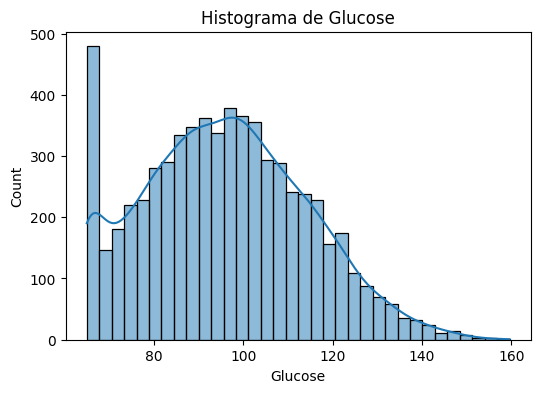

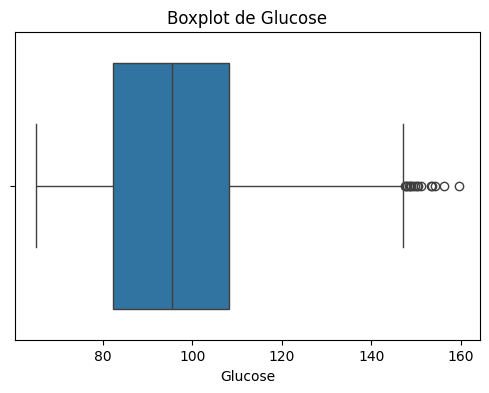

--- Alkaline_phosphatase ---
count    6062.000000
mean       85.173144
std        24.828124
min        30.000000
25%        68.200000
50%        84.700000
75%       101.900000
max       179.300000
Name: Alkaline_phosphatase, dtype: float64


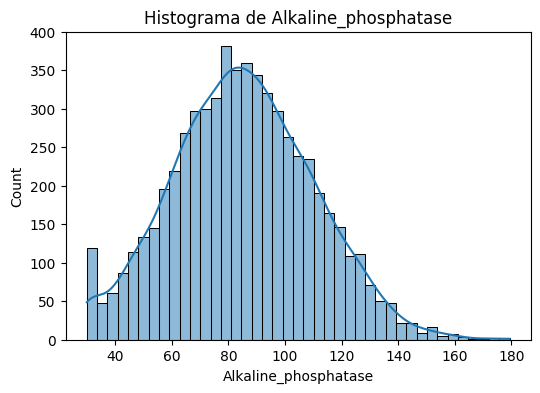

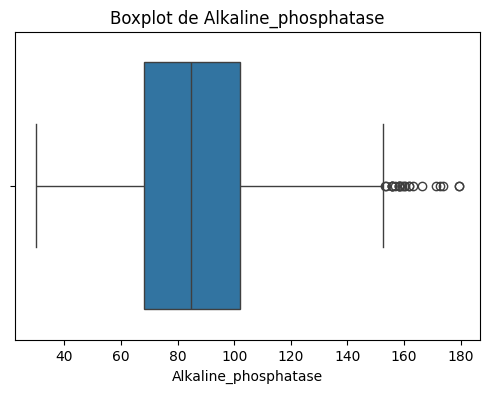

--- Polygenic_risk_score ---
count    8999.000000
mean        0.029846
std         0.140429
min        -0.437000
25%        -0.067000
50%         0.020000
75%         0.114000
max         0.575000
Name: Polygenic_risk_score, dtype: float64


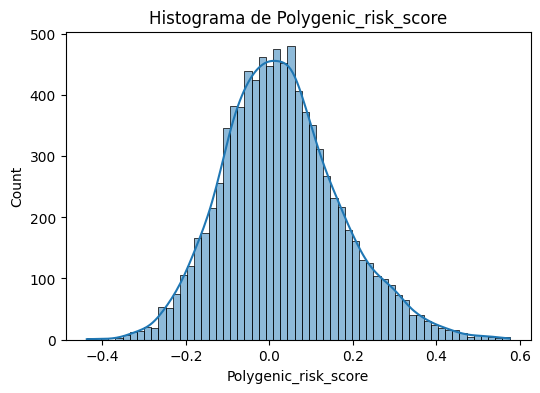

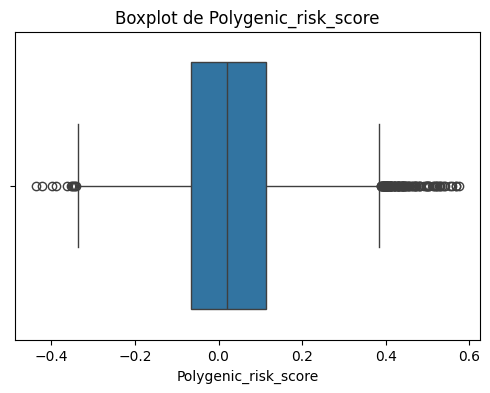

--- IL_17A ---
count    8999.000000
mean        2.661966
std         0.803387
min        -0.200000
25%         2.120000
50%         2.650000
75%         3.210000
max         5.380000
Name: IL_17A, dtype: float64


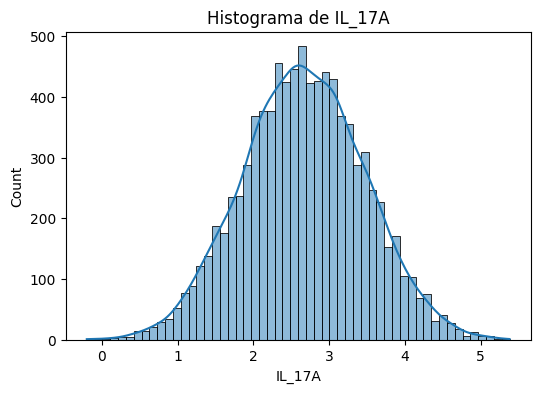

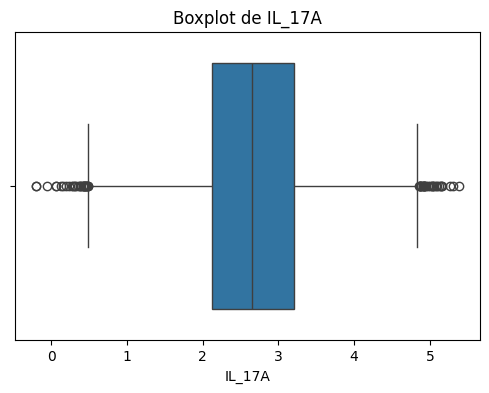

--- CCL23 ---
count    9000.000000
mean        3.784211
std         1.054171
min        -0.200000
25%         3.080000
50%         3.780000
75%         4.490000
max         7.690000
Name: CCL23, dtype: float64


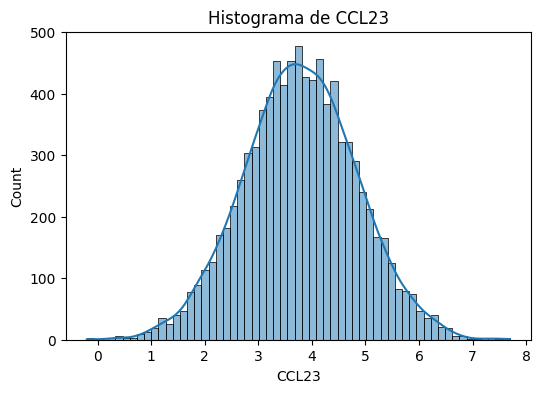

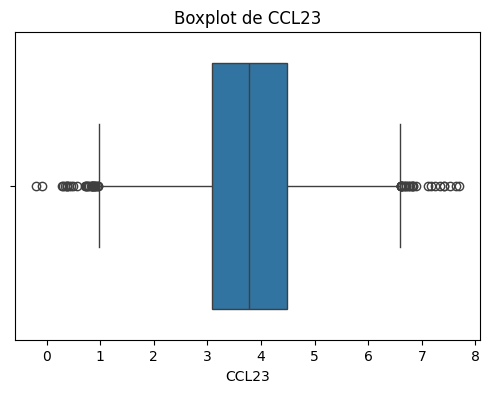

--- TWEAK ---
count    9000.000000
mean        4.193404
std         1.238844
min        -0.540000
25%         3.370000
50%         4.190000
75%         5.040000
max         8.920000
Name: TWEAK, dtype: float64


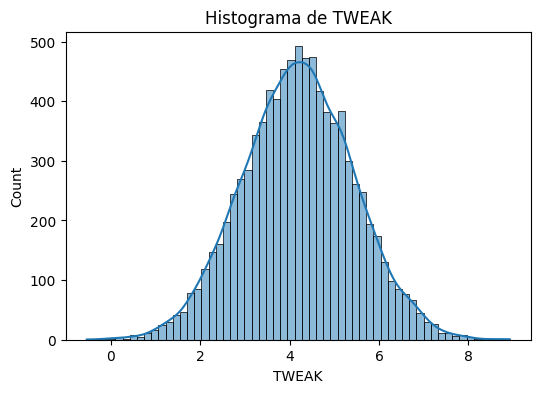

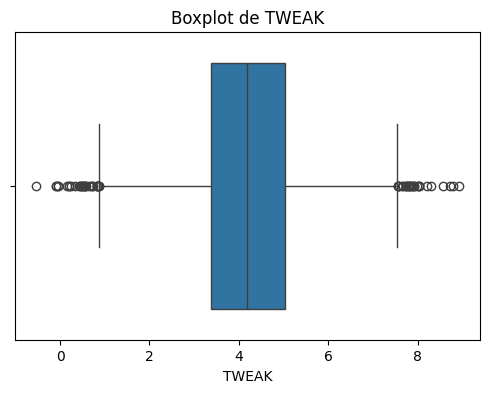

--- Ki_whole_striatum ---
count    9000.000000
mean        0.012973
std         0.002352
min         0.008000
25%         0.011320
50%         0.012880
75%         0.014520
max         0.020000
Name: Ki_whole_striatum, dtype: float64


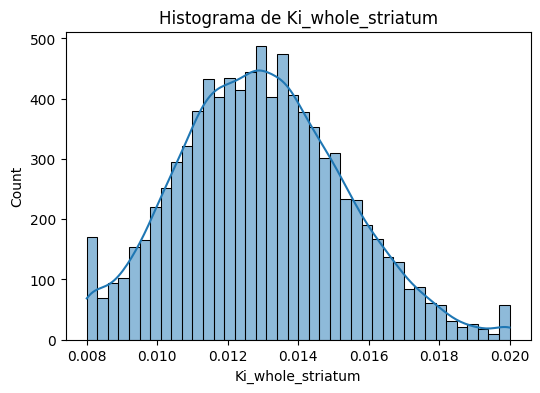

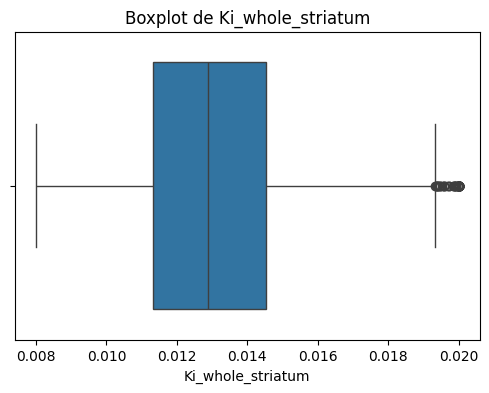

--- Ki_associative_striatum ---
count    9000.000000
mean        0.012973
std         0.002450
min         0.007080
25%         0.011250
50%         0.012840
75%         0.014550
max         0.021000
Name: Ki_associative_striatum, dtype: float64


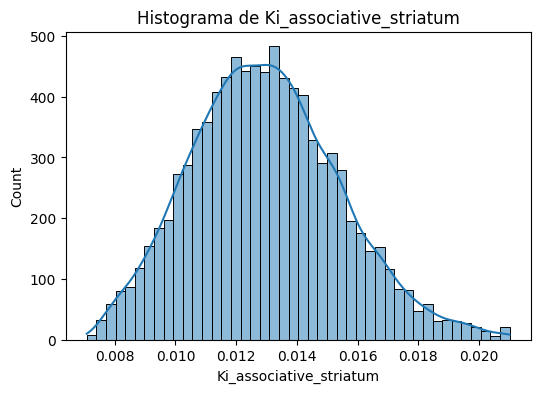

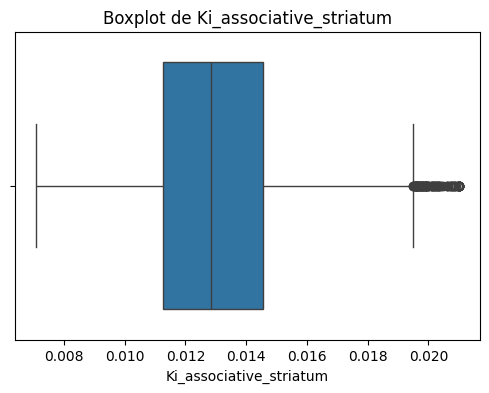

--- SUVRc_whole_striatum ---
count    9000.000000
mean        1.178423
std         0.266006
min         0.800000
25%         0.971000
50%         1.160000
75%         1.361000
max         2.000000
Name: SUVRc_whole_striatum, dtype: float64


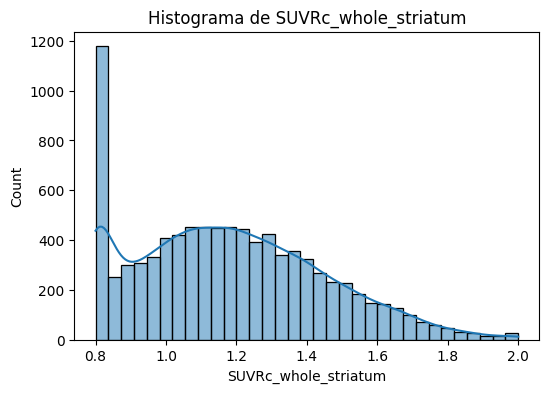

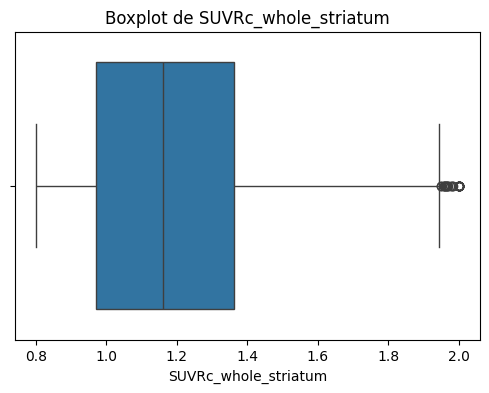

--- SUVRc_associative_striatum ---
count    9000.000000
mean        1.181993
std         0.274830
min         0.800000
25%         0.959000
50%         1.163000
75%         1.369000
max         2.000000
Name: SUVRc_associative_striatum, dtype: float64


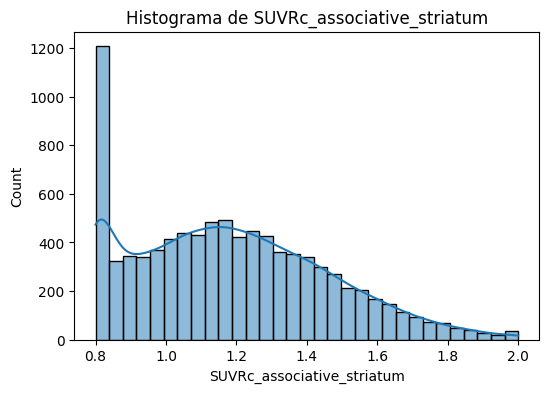

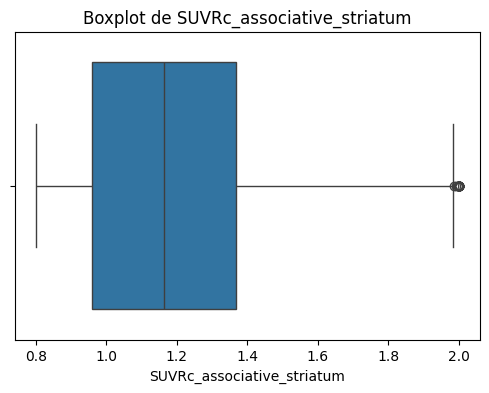

In [8]:
# Exemple loop per variables numèriques
num_cols = X_train.select_dtypes(include=np.number).columns

for col in num_cols:
    if col in ['patient_id']:  # Columnes a excloure
        continue
    
    # Estadístics descriptius
    print(f"--- {col} ---")
    print(X_train[col].describe())
    
    # Histograma
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X_train[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


## 7. Anàlisi exploratori de les característiques categòriques

--- Variable: Sex ---

Distribució de categories:
Sex
1    5184
0    3816
Name: count, dtype: int64 



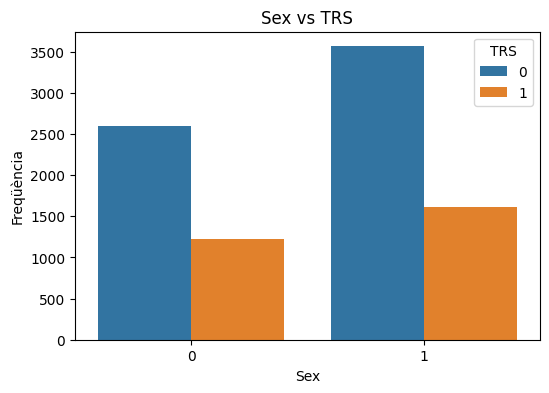

--- Variable: Ethnicity ---

Distribució de categories:
Ethnicity
Caucasian    5408
African      1403
Asian        1305
Hispanic      884
Name: count, dtype: int64 



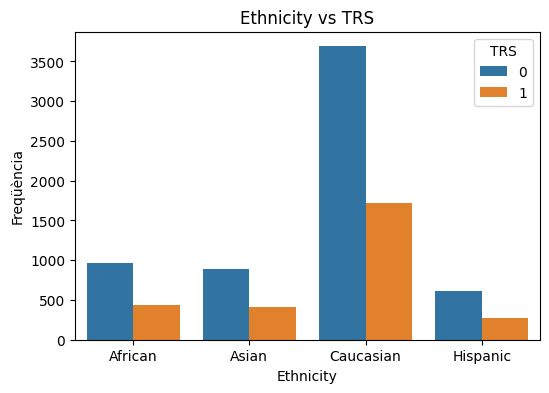

--- Variable: Family_history ---

Distribució de categories:
Family_history
0    7931
1    1069
Name: count, dtype: int64 



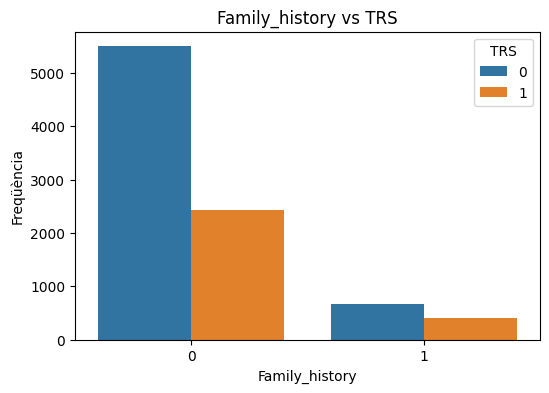

--- Variable: Prior_antipsychotics ---

Distribució de categories:
Prior_antipsychotics
0    6264
1    1802
2     934
Name: count, dtype: int64 



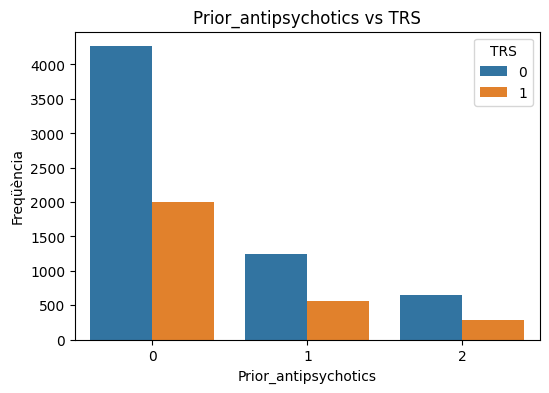

--- Variable: CYP2D6_metabolic_phenotype ---

Distribució de categories:
CYP2D6_metabolic_phenotype
Extensive       6874
Intermediate    1114
Ultrarapid       570
Poor             442
Name: count, dtype: int64 



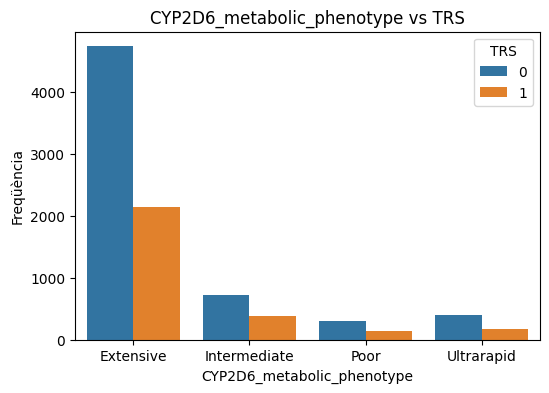

--- Variable: HLA_DRB1_04_02 ---

Distribució de categories:
HLA_DRB1_04_02
0    8782
1     218
Name: count, dtype: int64 



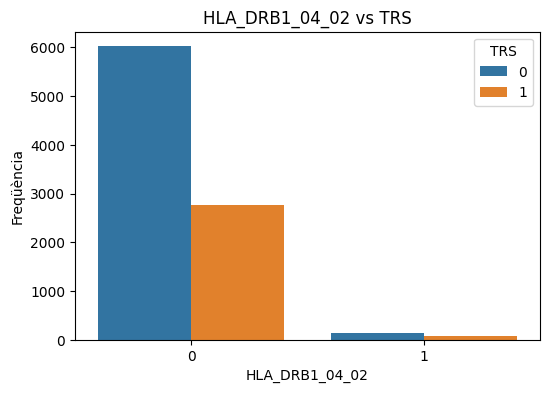

--- Variable: HLA_B_15_02 ---

Distribució de categories:
HLA_B_15_02
0    8713
1     287
Name: count, dtype: int64 



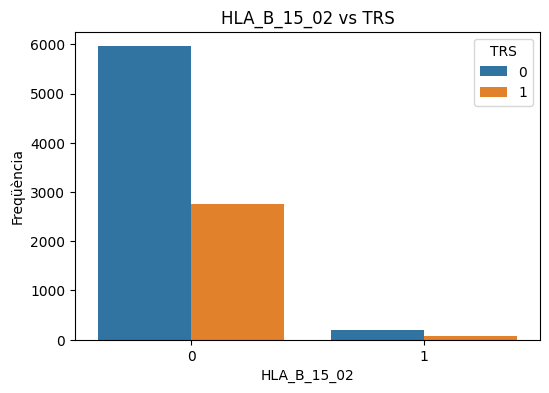

--- Variable: HLA_A_31_01 ---

Distribució de categories:
HLA_A_31_01
0    8592
1     408
Name: count, dtype: int64 



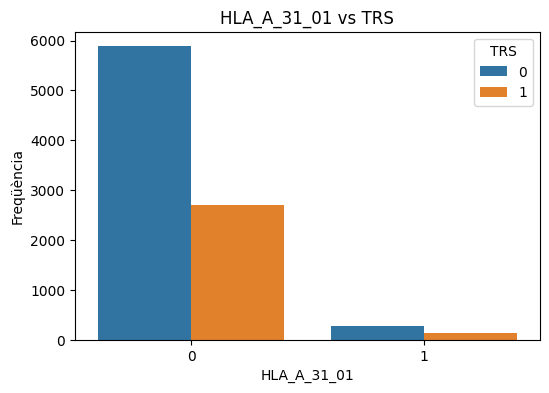

--- Variable: Del_22q11_2_status ---

Distribució de categories:
Del_22q11_2_status
0    8921
1      79
Name: count, dtype: int64 



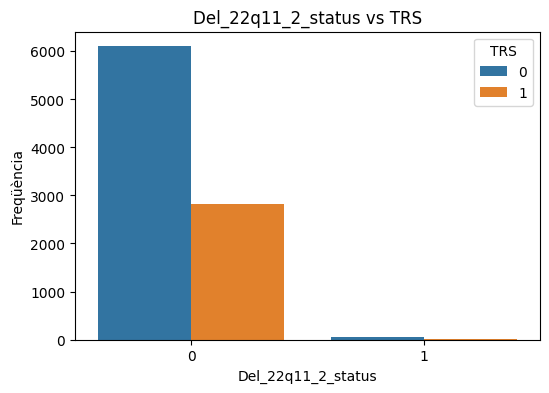

In [7]:
# Exemple loop per variables numèriques
num_cols = X_train.select_dtypes(include=['category']).columns

for col in num_cols:
    print(f"--- Variable: {col} ---\n")
    
    # Comptar observacions per categoria
    print("Distribució de categories:")
    print(X_train[col].value_counts(), "\n")
    
    # Gràfic de distribució de categories
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=Y_train, data=X_train.join(Y_train))
    plt.title(f"{col} vs TRS")
    plt.xlabel(col)
    plt.ylabel("Freqüència")
    plt.legend(title='TRS')
    plt.show()


## 8. PCA

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionem només numèriques
X = X_train.select_dtypes(include=[np.number])

# 1️⃣ Imputació (substituïm NaN per mediana)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 2️⃣ Escalat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3️⃣ PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variància explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Cumulative variance:", cumulative_variance)


Cumulative variance: [0.17751481 0.28281655 0.36524268 0.43587861 0.49318239 0.55001603
 0.60566403 0.6612254  0.71589    0.77035568 0.82141211 0.86136824
 0.90023099 0.93415385 0.96083199 0.98200098 0.99810792 1.        ]


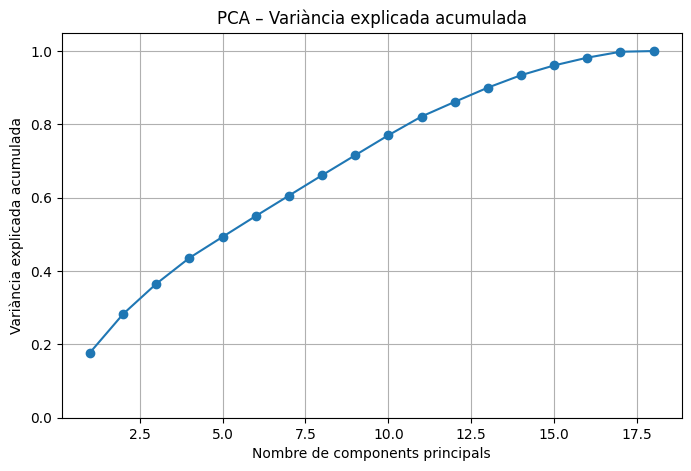

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1),
         cumulative_variance,
         marker='o')

plt.xlabel('Nombre de components principals')
plt.ylabel('Variància explicada acumulada')
plt.title('PCA – Variància explicada acumulada')
plt.grid(True)
plt.ylim(0, 1.05)

plt.show()


In [9]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Components necessaris per explicar el 90% de la variància: {n_components_90}")


Components necessaris per explicar el 90% de la variància: 13
